<a href="https://colab.research.google.com/github/Soumita24/TIHAN/blob/main/Lecture_14_Reg_vs_Class_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns

“If you study 5 hours, how many marks might you score?” → Regression.

“If you study 5 hours, will you pass or fail?” → Classification.

## 🔹 Regression Example
We will predict a **student’s exam score** based on the number of **study hours**.  
This is a **continuous value prediction problem**.


Linear regression is a fundamental supervised machine learning algorithm that establishes a linear relationship between a dependent (target) variable and one or more independent (predictor) variables to predict outcomes.

By fitting a straight line through data points, it identifies trends and enables data-driven decision-making, offering interpretable insights into variable relationships that can be used for forecasting and benchmarking more complex models.

##  Regression

**Real-life example 1: House Price Prediction**
- Input: Size of the house (in square feet).  
- Output: Predicted price (₹).  
- Type: Continuous number.  

**Real-life example 2: Student Marks Prediction**
- Input: Hours studied.  
- Output: Marks in exam.  
- Type: Continuous number.

Regression = "How much / What number?"

---


## How Linear Regression Works

1. Establish a Linear Relationship: The core idea is to find a linear equation that best describes the connection between the input variables (X) and the output variable (Y).

2. Best-Fit Line: The model aims to draw the best-fitting straight line through the data points, minimizing the distance between the line and the actual data points.

3. Predictive Modeling: Once the optimal line is determined, the model can use new observations of the independent variable(s) to predict the corresponding values of the dependent variable.

## Key Concepts

1. Dependent Variable: The output variable we are trying to predict.

2. Independent Variable(s): The input variables used to predict the dependent variable.

3. Coefficients (Weights): These are the numerical values that represent the slope in a linear equation, indicating the change in the dependent variable for a one-unit change in the independent variable.

4. Bias (Intercept): This is the value of the dependent variable when all independent variables are zero, similar to the y-intercept in an algebraic equation.

5. Loss Function: A function (like Mean Squared Error) used to measure the error or mismatch between the model's predictions and the actual values, guiding the process of finding the best-fit line.

## Applications in Machine Learning

Predictive Analysis: Forecasting future trends, such as stock prices or sales figures, based on historical data.

Data Analysis: Identifying patterns and relationships within datasets to provide actionable insights for decision-makers in various industries.

Model Evaluation: Serving as a baseline or benchmark model to compare the performance of more advanced algorithms.

- Predicting **house prices**
- Forecasting **stock market trends**
- Predicting **temperature**
- Estimating **student marks** based on study hours  

###  Advantages
- Easy to understand and interpret.  
- Provides exact **numeric predictions** (not just categories).  
- Works well when the relationship is **linear**.  

###  Limitations
- Cannot handle categorical outputs (Pass/Fail, Spam/Not Spam).  
- Sensitive to **outliers** (a single extreme value can distort the line).  
- May not work well if the relationship is **non-linear**.  

---

In [2]:
# Create synthetic regression data
np.random.seed(42)
hours = np.random.randint(1, 10, 50).reshape(-1, 1)    # study hours
noise  = np.random.randint(-5, 5, 50)                  # same noise array
scores = (5 * hours.ravel() + noise).reshape(-1, 1)   # exam scores with some noise

np.random.randint(-5, 5, 10)

-5 → the lowest value (inclusive).
→ The random numbers can include -5.

5 → the highest value (exclusive).
→ The random numbers go up to 4, but not 5.

So possible values are: -5, -4, -3, -2, -1, 0, 1, 2, 3, 4.

50 → the number of samples to generate.
→ You will get 50 random integers between -5 and 4.


.reshape(-1, 1) :

Machine learning models in scikit-learn expect features (X) to be 2D arrays → shape (n_samples, n_features).

If you have hours as [5, 6, 7, 8], that’s shape (4,) → 1D.

The model won’t accept it.

-1 → tells NumPy to automatically calculate how many rows are needed.

1 → means one feature (column).

In [3]:
import pandas as pd
data = pd.DataFrame({
    "Study Hours": hours.ravel(),
    "Exam Score": scores.ravel()
})

print(" First 10 rows of generated dataset:")
print(data.head(10))

 First 10 rows of generated dataset:
   Study Hours  Exam Score
0            7          33
1            4          16
2            8          40
3            5          25
4            7          39
5            3          13
6            7          35
7            8          36
8            5          29
9            4          16


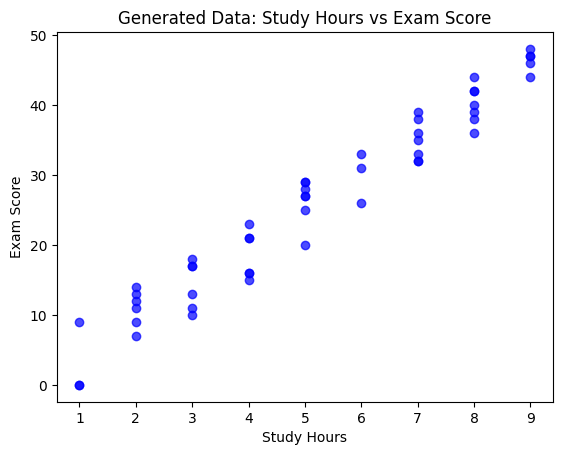

In [4]:
#  Scatter plot of full dataset
plt.scatter(hours, scores, color="blue", alpha=0.7)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Generated Data: Study Hours vs Exam Score")
plt.show()

In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    hours, scores, test_size=0.2, random_state=42
)


In [6]:
# Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predictions
y_pred = reg_model.predict(X_test)


In [8]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Regression Results:
Mean Squared Error (MSE): 7.99
R² Score: 0.93


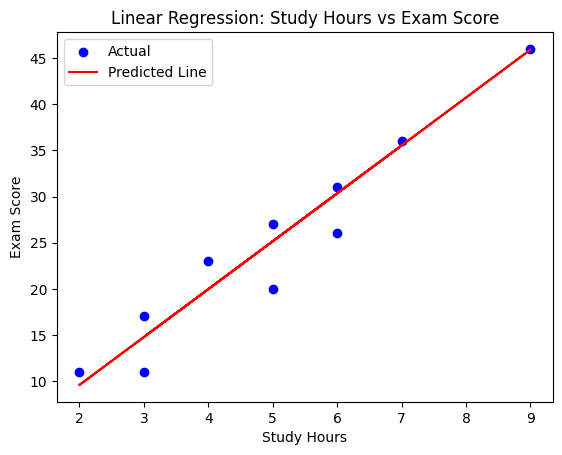

In [9]:
plt.scatter(X_test.ravel(), y_test, color="blue", label="Actual")
plt.plot(X_test.ravel(), y_pred, color="red", label="Predicted Line")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Linear Regression: Study Hours vs Exam Score")
plt.legend()
plt.show()


 **Explanation:**
- We generated data: `study hours → exam score`.  
- `LinearRegression()` learns a straight line (y = mx + c).  
- **MSE (Mean Squared Error)** tells how far predictions are from true values (lower is better).  



- **$R^2$ Score**: The coefficient of determination/$R^2$ is a statistical measure that provides information about the goodness of fit of a model. $R^2$ value denotes the % of variation in the dependent variable explained by the independent variable in the regression model.

A score closer to 1 signifies a strong fit, meaning the model explains most of the data's variation, while a score of 0 suggests the model explains none, and scores less than 0 imply the model performs worse than simply predicting the mean.

 While high R² values indicate a good model fit, it's crucial to also consider other metrics and avoid the pitfalls of overfitting, where the model learns noise and performs poorly on unseen data, or adding too many variables.

## 🔹 Classification Example
Now, let’s classify whether a **student passes or fails** based on study hours.  
- If score ≥ 25 → Pass (1)  
- Else → Fail (0)  
This is a **binary classification problem**.

 Logistic Regression is a powerful supervised learning algorithm used in machine learning for classification tasks, not regression, despite its name, as it predicts the probability of a categorical outcome.

It models the relationship between independent variables and a binary dependent variable (like Yes/No, True/False, or 0/1) by applying a sigmoid function to a linear combination of inputs, outputting probabilities between 0 and 1.

This probabilistic output is then used to classify data points by setting a threshold (often 0.5), making it highly effective for problems like spam detection or medical diagnosis.

**Real-life example 1: Pass or Fail**
- Input: Hours studied.  
- Output: "Pass" or "Fail".  
- Type: Category (binary).

**Real-life example 2: Email Spam Detection**
- Input: Email content (words).  
- Output: "Spam" or "Not Spam".  
- Type: Category.

Classification = "Which category / class?"

---


How It Works

1. Supervised Learning: Logistic regression is a supervised algorithm, meaning it learns from labeled historical data to make predictions on new, unseen data.

2. Binary Classification: Its primary use is for binary classification, where the goal is to assign an instance to one of two possible categories.

3. Sigmoid Function: Instead of outputting a continuous value, the algorithm uses a sigmoid (or logistic) function to "squash" the output of a linear equation into a probability range of 0 to 1.

4. Probability and Thresholds: The sigmoid function provides a probability for each class. A decision boundary, typically set at 0.5, is then used to assign the input to either class 0 or class 1. If the probability is above the threshold, it's classified into one class; otherwise, it falls into the other.




Key Characteristics

1. Categorical Output: While it uses regression in its name and mechanics, its output is a probability that can be used for classification.

2. Decision Boundaries: The sigmoid function creates a decision boundary, which is a linear boundary in the feature space for binary classification.

3. Versatility: It can be extended to handle multi-class classification, though it is most commonly used for binary classification problems.

###  Applications
- **Spam detection** in emails
- **Medical diagnosis** (disease or no disease)
- **Customer churn** prediction (will leave or stay)  
- **Pass/Fail** prediction in exams

###  Advantages
- Works with both **binary and multi-class problems**.  
- Can achieve high accuracy in classification tasks.  
- Provides **probabilities** (e.g., 80% chance of passing).  

###  Limitations
- Does not give numeric predictions (only categories).  
- Can be biased if data is **imbalanced** (e.g., 90% Pass, 10% Fail).  
- Decision boundaries may be hard to interpret in complex models.

In [10]:
#  Create classification labels
labels = (scores >= 25).astype(int)  # 1 = pass, 0 = fail

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(hours, labels, test_size=0.2, random_state=42)

In [12]:
# Train Logistic Regression model
clf_model = LogisticRegression()
clf_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
# Predictions
y_pred = clf_model.predict(X_test)

In [14]:
# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(" Classification Results:")
print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

 Classification Results:
Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



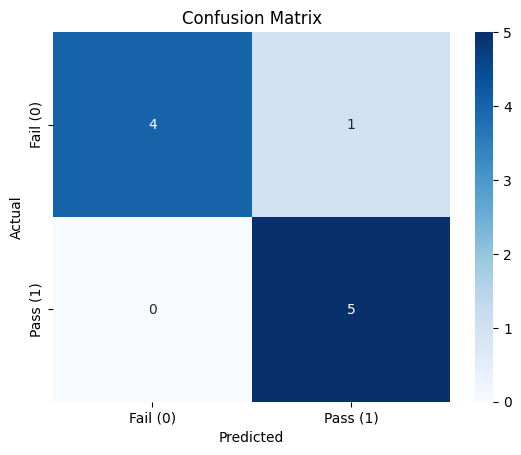

In [15]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Fail (0)", "Pass (1)"],
            yticklabels=["Fail (0)", "Pass (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


 **Explanation:**
- We converted exam scores into categories (Pass/Fail).  
- `LogisticRegression()` learns a probability curve (S-shape).
A classification algo used to assign observations to a discrete set of classes.

Types of LR:

- **Binary LR**: Email(Spam/Non-Spam) , Churn/No-Churn

- **Multinomial LR**: IRIS dataset

- **Ordinal LR**: Student Grades(A,B,C,D)


---


**Confusion Matrix**: A confusion matrix is a nxn matrix used for evaluating the performance of a classification model where n is the no. of target class labels,
The matrix compares the actual target values with those predicted by the classification model.

- **Accuracy**:Overall how often is the classifier correct.
- **Precision**: When model predicts yes, how often it is correct.
- **Recall**: It is also k.a. true positive rate / sensitivity.
When its actually yes, how often it predicts yes.
- **Specificity**: Also k.a. true negative rate.
When its actually no, how often does it predicts no.
- **F1**:Harmonic mean of precision and recall.
Value between 0 to 1.
- **Misclassification Rate/ Error Rate** : (1- Accuracy)

# Comparison: Regression vs Classification

| Aspect              | Regression                             | Classification                           |
|---------------------|-----------------------------------------|------------------------------------------|
| Output              | Continuous value (e.g., 72.5 marks)    | Discrete label (e.g., Pass/Fail)         |
| Model Used          | Linear Regression                      | Logistic Regression                      |
| Example Metric      | MSE, R²                                | Accuracy, Precision, Recall, F1          |
| Use Cases           | House prices, salary, temperature      | Spam detection, disease prediction       |

---

#  Key Takeaways
1. **Regression** predicts numbers.  
2. **Classification** predicts categories.  
3. Metrics differ:  
   - Regression → error & variance explained.  
   - Classification → accuracy & confusion matrix.  
4. Both are **supervised learning problems**.  


#  Real-World Case Studies: Regression vs Classification

---

##  Case Study 1: Real Estate (House Prices vs House Type)

- **Regression Example**: Predict the **price of a house** based on area, location, and number of rooms.  
  - Question: *"How much will this house cost?"*  
  - Output: ₹56,00,000 (a number)

- **Classification Example**: Predict whether a house is **Apartment, Villa, or Independent House**.  
  - Question: *"Which type of house is this?"*  
  - Output: *Villa* (a category)

---

##  Case Study 2: Banking & Finance

- **Regression Example**: Predict the **credit score** of a customer based on salary, debts, and transactions.  
  - Output: 720 points

- **Classification Example**: Predict whether a **loan application will be approved or rejected**.  
  - Output: *Approved* / *Rejected*

---

##  Case Study 3: Healthcare

- **Regression Example**: Predict the **blood sugar level** of a patient after meals.  
  - Output: 145 mg/dL  

- **Classification Example**: Predict whether a patient has **Diabetes or Not**.  
  - Output: *Yes* / *No*

---

##  Case Study 4: Education

- **Regression Example**: Predict a student’s **marks** in Mathematics based on hours studied.  
  - Output: 82 marks  

- **Classification Example**: Predict whether the student will **Pass or Fail**.  
  - Output: *Pass*

---
